# Yahoo! News Scraper

In [46]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

#### Setup the url template and request headers

In [47]:
headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

In [48]:
template = 'https://in.search.yahoo.com/search?p=i+phone+12+&fr=uh3_news_web_gs&fr2=p%3Anews%2Cm%3Asb'
#template = 'https://www.justdial.com/Kolkata/Transporters/nct-10495191/page-2'

In [49]:
url = template.format('iphone 12 leaked')

#### Get the collection of articles

In [50]:
response = requests.get(url, headers=headers)
#response = requests.get(template, headers=headers).text

In [51]:
soup = BeautifulSoup(response.text, 'html.parser')
#soup = BeautifulSoup(response, 'html.parser')

In [52]:
cards = soup.find_all('div', 'NewsArticle')
#cards = soup.find_all('a')

In [53]:
cards

[]

#### Create a prototype model for extracting article data

In [44]:
card = cards[5]

<!DOCTYPE doctype html>
<html class="NoJs" id="atomic" lang="en-US"><head><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_76.min.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_114.min.png" rel="apple-touch-icon" sizes="114x114"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_120.min.png" rel="apple-touch-icon" sizes="120x120"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><noscript><meta content="0;url=https://news.search.yahoo.com/search?p=iphone+12+leaked&amp;ei=UTF-8&amp;nojs=1" http-equiv="refresh"/></noscript><script nonce="nisd3qyouVlUW/Ju77djRg==" type="text/javascript">(function(){var j=window,s=document,u,o;var c=false;var r=false;var p=2,m="\x03",l="\x04",n="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123
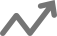
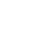
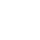
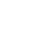
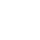

In [ ]:
soup

In [ ]:
headline = card.find('h4', 's-title').text

In [ ]:
headline

'What OnePlus 9 Pro Official Images Reveal About The 2021 Phone'

In [ ]:
source = card.find("span", 's-source').text

In [ ]:
source

'Screen Rant'

In [ ]:
posted = card.find('span', 's-time').text.replace('·', '').strip()

In [ ]:
description = card.find('p', 's-desc').text.strip()

The url needs a little more cleaning... the original URL is hiding inside the Yahoo! News link

In [ ]:
description

'OnePlus CEO Pete Lau shared official renders of the OnePlus 9 Pro on his Twitter account. Lau shared...'

In [ ]:
raw_link = card.find('a').get('href')
raw_link

'https://r.search.yahoo.com/_ylt=AwrC0CP4OXVfWXEAegHQtDMD;_ylu=Y29sbwNiZjEEcG9zAzYEdnRpZAMEc2VjA3Ny/RV=2/RE=1601546872/RO=10/RU=https%3a%2f%2fwww.ibtimes.com%2fapple-rumors-iphone-12-may-not-come-earpods-box-report-says-3054323/RK=2/RS=LzK2Rj4LT8D9wvTORmd4NlpBF34-'

In [ ]:
unquoted_link = requests.utils.unquote(raw_link)
unquoted_link

'https://r.search.yahoo.com/_ylt=AwrC0CP4OXVfWXEAegHQtDMD;_ylu=Y29sbwNiZjEEcG9zAzYEdnRpZAMEc2VjA3Ny/RV=2/RE=1601546872/RO=10/RU=https://www.ibtimes.com/apple-rumors-iphone-12-may-not-come-earpods-box-report-says-3054323/RK=2/RS=LzK2Rj4LT8D9wvTORmd4NlpBF34-'

In [ ]:
pattern = re.compile(r'RU=(.+)\/RK')
clean_link = re.search(pattern, unquoted_link).group(1)
clean_link

'https://www.ibtimes.com/apple-rumors-iphone-12-may-not-come-earpods-box-report-says-3054323'

#### Generalize the model

In [ ]:
def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

In [ ]:
articles = []
links = set()

for card in cards:
    article = get_article(card)
    link = article[-1]
    if not link in links:
        links.add(link)
        articles.append(article)

In [ ]:
articles[:5]

[('iPhone 12 and iPhone 12 Pro: Everything we know about Apple’s new phones',
  'Digital Trends via Yahoo Finance',
  '11 hours ago',
  'This year, it’s going to be the latter — considering Apple’s September 15 hardware event has come...',
  'https://finance.yahoo.com/news/iphone-12-coming-fall-everything-185615475.html'),
 ('iPhone 12 Mini, iPhone 12 And iPhone 12 Pro Storage Configurations Leaked',
  'International Business Times',
  '14 hours ago',
  "Rumors about Apple's upcoming iPhone 12 series handsets abound as the Cupertino tech giant has yet...",
  'https://www.ibtimes.com/iphone-12-mini-iphone-12-iphone-12-pro-storage-configurations-leaked-3054361'),
 ('The first iPhone 12 models to launch next month just leaked',
  'BGR',
  '2 days ago',
  'The first iPhone 12 versions to launch in stores in October might be the cheapest models, according...',
  'https://bgr.com/2020/09/29/iphone-12-release-date-models-apple-event-october-13th-rumor/'),
 ('Apple Accident Confirms New iPhone

#### Get the next page

In [ ]:
url = soup.find('a', 'next').get('href')
url

'https://news.search.yahoo.com/search;_ylt=AwrC0CP4OXVfWXEAhgHQtDMD;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3BhZ2luYXRpb24-?p=iphone+12+leaked&b=11&pz=10&bct=0&xargs=0'

#### Bringing it all together

In [ ]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

def get_the_news(search):
    """Run the main program"""
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    articles = []
    links = set()
    
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        
        # extract articles from page
        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)        
                
        # find the next page
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
            
    # save article data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
        writer.writerows(articles)
        
    return articles

In [ ]:
articles = get_the_news('iphone 12 leaked')

In [ ]:
articles[:5]

[('iPhone 12 and iPhone 12 Pro: Everything we know about Apple’s new phones',
  'Digital Trends via Yahoo Finance',
  '11 hours ago',
  'This year, it’s going to be the latter — considering Apple’s September 15 hardware event has come...',
  'https://finance.yahoo.com/news/iphone-12-coming-fall-everything-185615475.html'),
 ('iPhone 12 Mini, iPhone 12 And iPhone 12 Pro Storage Configurations Leaked',
  'International Business Times',
  '14 hours ago',
  "Rumors about Apple's upcoming iPhone 12 series handsets abound as the Cupertino tech giant has yet...",
  'https://www.ibtimes.com/iphone-12-mini-iphone-12-iphone-12-pro-storage-configurations-leaked-3054361'),
 ('The first iPhone 12 models to launch next month just leaked',
  'BGR',
  '2 days ago',
  'The first iPhone 12 versions to launch in stores in October might be the cheapest models, according...',
  'https://bgr.com/2020/09/29/iphone-12-release-date-models-apple-event-october-13th-rumor/'),
 ('Apple Accident Confirms New iPhone